/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_60463/648378279.py:12: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_60463/648378279.py:24: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_60463/648378279.py:30: RuntimeWarning: invalid value encountered in divide
  gamma = pdf_d1 / (S * sigma * np.sqrt(T))


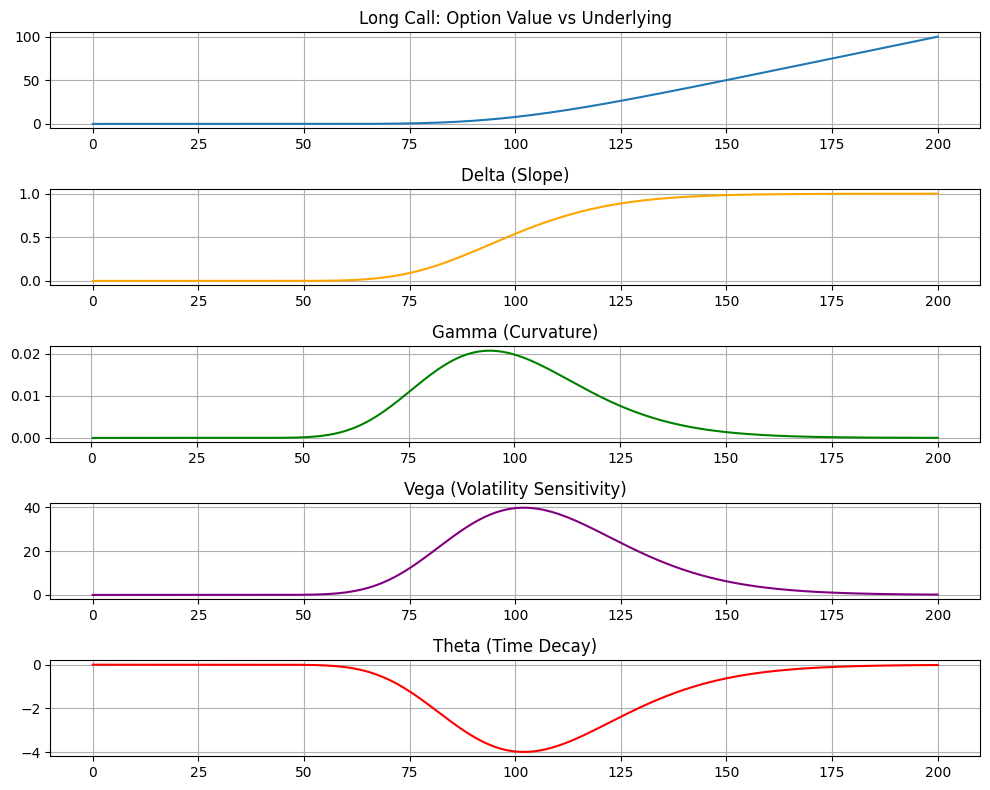

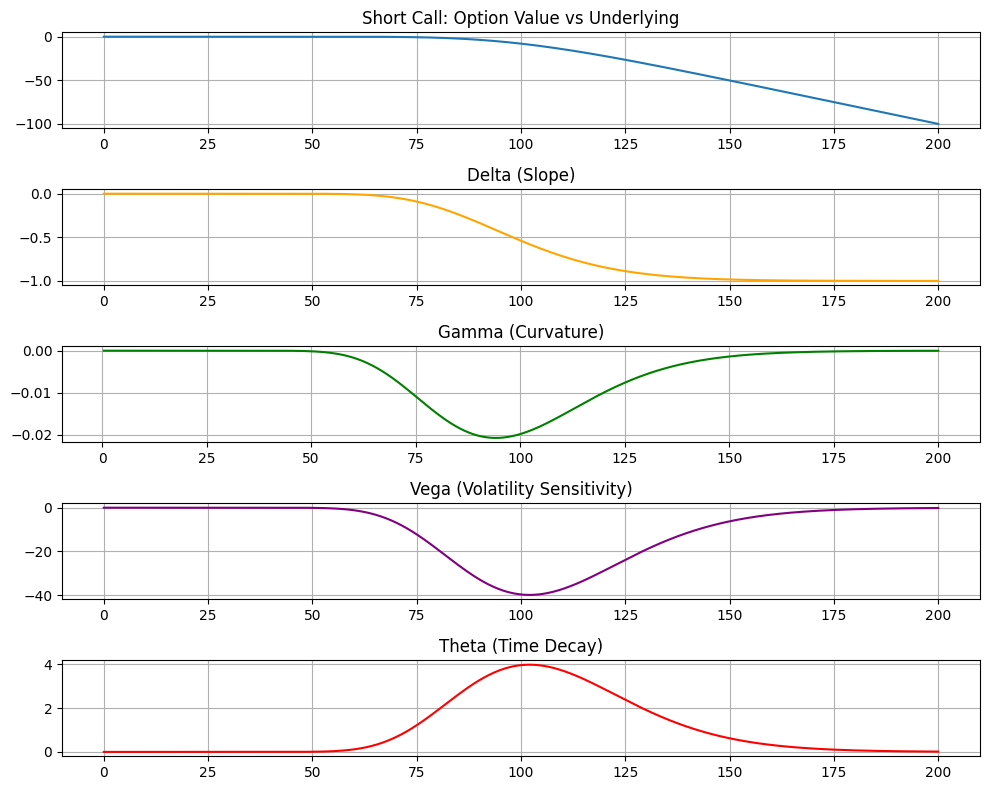

/var/folders/mb/jndfbk9113zdwxnjj2lxdm0h0000gn/T/ipykernel_60463/648378279.py:18: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


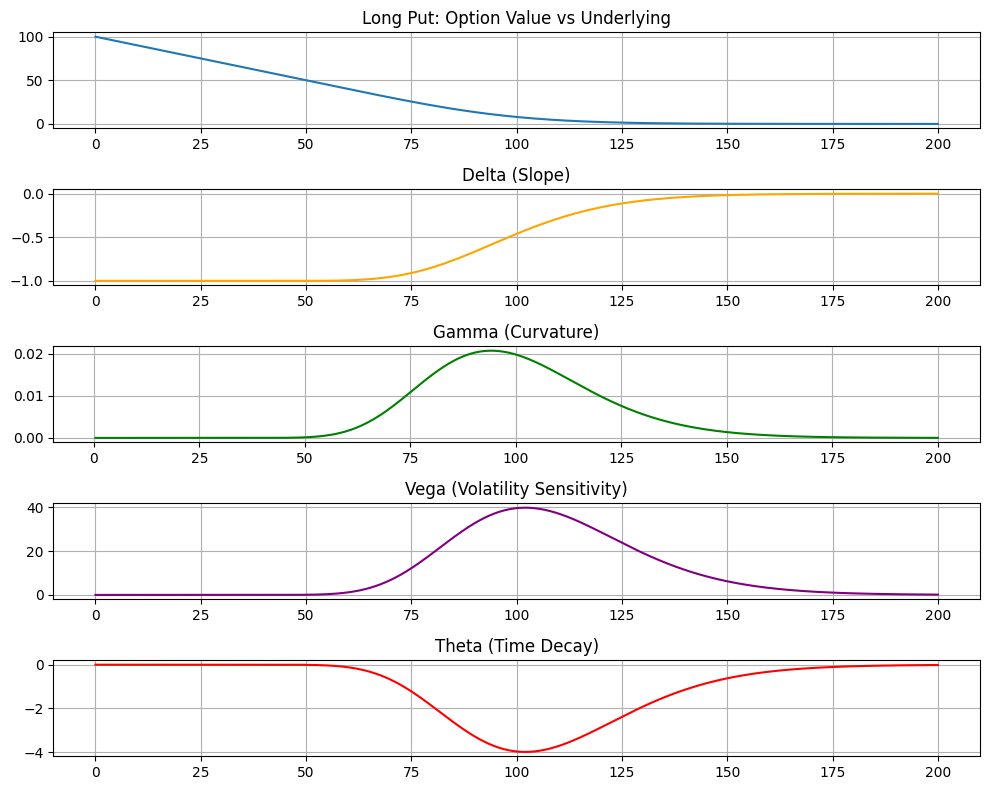

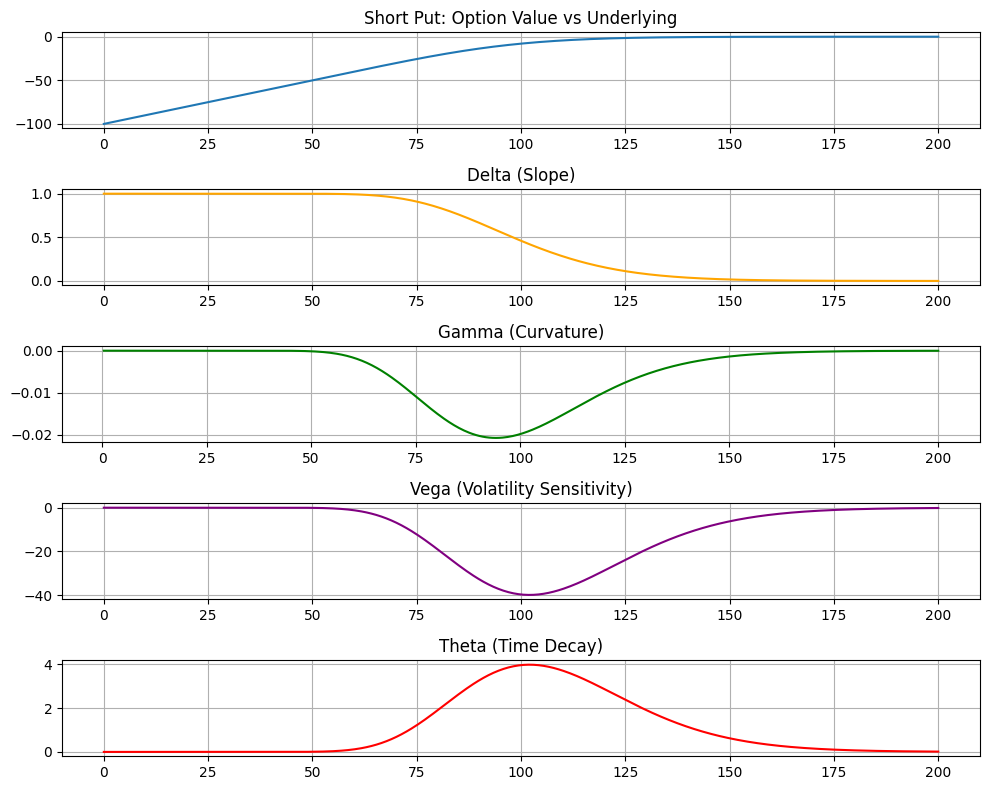

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

S = np.linspace(0, 200, 500)
K = 100
r = 0.0
T = 1.0
sigma = 0.2

def bs_call(S, K, r, T, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - np.exp (-r * T) * K * norm.cdf(d2)
    return call_price

def bs_put(S, K, r, T, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = np.exp(-r * T) * K * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

def bs_greeks(S, K, r, T, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    pdf_d1 = norm.pdf(d1)

    delta = norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1
    gamma = pdf_d1 / (S * sigma * np.sqrt(T))
    vega = S * pdf_d1 * np.sqrt(T)
    theta = (-S * pdf_d1 * sigma / (2 * np.sqrt(T))
             - r * K * np.exp(-r * T) * (norm.cdf(d2) if option_type == "call" else norm.cdf(-d2)))
    rho = K * T * np.exp(-r * T) * (norm.cdf(d2) if option_type == "call" else -norm.cdf(-d2))

    return delta, gamma, vega, theta, rho

def plot_option(S, K, r, T, sigma, title, option_type='call', position='long', show_extra=False):
    plt.figure(figsize=(10, 8 if show_extra else 6))

    price = bs_call(S, K, r, T, sigma) if option_type == 'call' else bs_put(S, K, r, T, sigma)
    delta, gamma, vega, theta, rho = bs_greeks(S, K, r, T, sigma, option_type)

    if position == 'short':
        price, delta, gamma, vega, theta, rho = [-x for x in (price, delta, gamma, vega, theta, rho)]

    plt.subplot(3 if not show_extra else 5, 1, 1)
    plt.plot(S, price, label='Value')
    plt.title(f"{title}: Option Value vs Underlying")
    plt.grid(True)

    plt.subplot(3 if not show_extra else 5, 1, 2)
    plt.plot(S, delta, color='orange', label='Delta')
    plt.title("Delta (Slope)")
    plt.grid(True)

    plt.subplot(3 if not show_extra else 5, 1, 3)
    plt.plot(S, gamma, color='green', label='Gamma')
    plt.title("Gamma (Curvature)")
    plt.grid(True)

    if show_extra:
        plt.subplot(5, 1, 4)
        plt.plot(S, vega, color='purple', label='Vega')
        plt.title("Vega (Volatility Sensitivity)")
        plt.grid(True)

        plt.subplot(5, 1, 5)
        plt.plot(S, theta, color='red', label='Theta')
        plt.title("Theta (Time Decay)")
        plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_option(S, K, r, T, sigma, "Long Call", option_type='call', position='long', show_extra=True)
plot_option(S, K, r, T, sigma, "Short Call", option_type='call', position='short', show_extra=True)
plot_option(S, K, r, T, sigma, "Long Put", option_type='put', position='long', show_extra=True)
plot_option(S, K, r, T, sigma, "Short Put", option_type='put', position='short', show_extra=True)


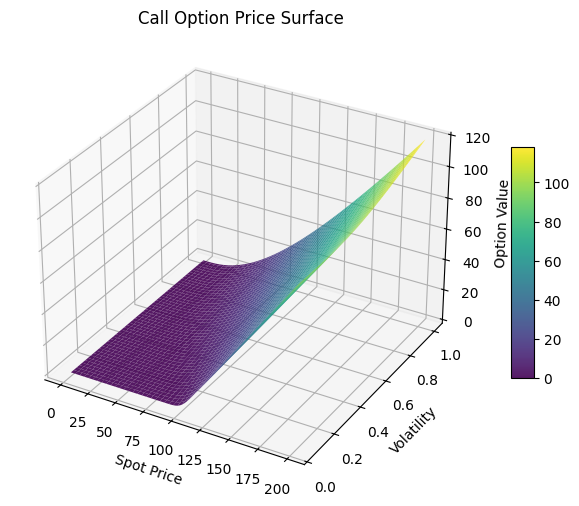

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

S = np.linspace(0.01, 200, 100)
K = 100
r = 0.0
T = 1.0
sigmas = np.linspace(0.05, 1.0, 100)
    
S_grid, sigma_grid = np.meshgrid(S, sigmas)
call_surface = bs_call(S_grid, K, r, T, sigma_grid)


S_grid, sigma_grid = np.meshgrid(S, sigmas)
call_surface = bs_call(S_grid, K, r, T, sigma_grid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S_grid, sigma_grid, call_surface, cmap='viridis', alpha=0.9)

ax.set_xlabel('Spot Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Option Value')
ax.set_title('Call Option Price Surface')

fig.colorbar(surf, shrink=0.5, aspect=10)


plt.ion()
plt.show()